# Executive Summary #


In this study, we strived to implement machine learning models that allows us to answer the following question: Do differences in campaign financing contribution amounts account for differences in the percentage of votes received for winning candidates (land slide or close call election) during the 2020 House of Representatives election? As further described in the Data Description, the dataset was obtained using a combination of web scraping from Wikipedia and data collection from Open Secrets. During our investigative analysis that can be seen in the Initial Visualizations section, it was seen that for the most part, there was no linear relationship between each of the campaign financing contributions factors and that the average contribution amounts across the 5 categories decreased as the winning candidate's percentage of votes received increased. As further detailed in our Machine Learning section, we implemented a Linear Regression Model, Cross Validated R^2 Random Forest Regressor, and Random Forest Regressor Features Importance Graph to assess the relationship between the contribution totals and the winning candidate's percentage of votes received, the program's ability to accurately match predictions to the actual values (assessing variance), and the relative importance of each campaign financing feature used by the Random Forest Regressor. Our results showed us that there is a very weak (close to 0), negative relationship between the winning candidate's percentage of votes received and the total contribution data as well and that the regressor model was able to explain only about 19.73% of the variance in the winning candidate percentage variable with Large Individual Contributions being the most important in the regressor to make these predictions. Some possible reasoning for these weakly related variables may be that there are other confounding variables and other factors that more strongly account for this change as well as the idea that a certain point, additional campaign contributions have a diminishing impact on the outcome of the election (this is more heavily discussed in the Discussion section).

# Introduction #
Campaign financing has acted as a contentious source of debate throughout the trajectory of United States history. Many suggest that the influence of campaign financing challenges American democracy as it grants power not to those with a higher number of supporters, but rather to those who can give large contributions. Specifically, much debate has been focused on the role of self-financing and political action committees (PACs) in contributing to a candidate’s campaign. This is because these methods of campaign financing can lead to a more oligarchical government that is effectively run at the special interests of a select few whether that be of specific interest groups or the candidate themselves. This designates precedence to interest groups over ordinary citizens and can lead to corruption and lack of accountability further down the line.

One of the most influential federal jurisdictions that have offered legal guidance on this issue is the Federal Election Campaign Act. According to Caltech Science Exchange, “The act and its subsequent amendments set limits on campaign fundraising and spending, established disclosure requirements for campaign contributions, and created the Federal Election Commission (FEC), the agency that enforces federal campaign finance law" (1). According to the Brennan Center for Justice, the case of, “Citizens United and other court rulings ended decades of commonsense campaign finance laws. Now a handful of wealthy special interests dominate political funding, often through super PACs and shadowy nonprofits that shield donors’ identities" (2).

American citizens investing their own hard earned money on candidates they believe in offers up a faith and trust that can often be met with deceit and corruption. This can be most recently seen on April 6, 2023 when news broke that Mecklenburg County Democrats called for the resignation of North Carolina Representative Tricia Cotham after switching her partisan affiliation to the Republican Party and thereby giving Republicans a supermajority in the House. This is despite Coltham’s reliance on Democrat contributors to donate to her campaign who are now demanding refunds for her dishonesty (3). A similar story comes from New York Representative George Santos who was accused of flaunting or hinting at key pieces of his resume that have turned out to be false as he raised money for his successful congressional campaign. According to Fox News, “[It] adds to an emerging picture of a winning congressional campaign propelled by fabrications and questionable tactics" (4).

Our work will be specifically looking at the House of Representatives 2020 Election. We will be attempting to analyze the relationship between the majority percentage of a Winning Candidate's votes and the total contributions received (as well as isolating each contribution variable to understand the implication they have on majority percentage). With a study indicating that in the 1998 House of Representatives election, 98% of already sitting members were reelected (5), why do some incumbent candidates win more significantly than others (in a landslide vs a close call)? Did candidates who won in a landslide receive more contributions then those winning candidates for which it was a close call? Since many candidates running were Incumbents, do they need to put less effort into fundraising since they have already held the position? We predict that the greater the amount of contributions a candidate has, the higher the margin of percent of votes and thereby, a greater chance of a landslide election.

(1) https://scienceexchange.caltech.edu/topics/voting-elections/campaign-funding-finance-explained

(2) https://www.brennancenter.org/issues/reform-money-politics/public-campaign-financing

(3) https://www.charlotteobserver.com/news/politics-government/article273997235.html

(4) https://www.cnbc.com/2023/01/09/george-santos-raised-money-from-wealthy-gop-donors-while-lying-about-his-resume.html

(5) https://cusdi.org/faq/why-are-sitting-members-of-congress-almost-always-reelected/

# Data Description #

Since our original Kaggle Dataset shown in our Data & Analysis was not conducive for machine learning (which we realized after our meeting with Professor Higger), we decided to find a new dataset that would allow us to analyze each row as an election rather than as a candidate. This led us to finding this Wikipedia page that provided the results of the 2020 Election for the House of Representatives. The 50 tables for each state were collected through webscraping and were then concatenated together as can be seen below:

https://en.wikipedia.org/wiki/2020_United_States_House_of_Representatives_elections#cite_note-AR2020-47

In [1]:
import pandas as pd

# url to the wikipedia page
url = "https://en.wikipedia.org/wiki/2020_United_States_House_of_Representatives_elections"

# read all the tables from the Wikipedia page
tables = pd.read_html(url)

# individual state tables collected and eventually concatenated 
all_tables = []

# index for tables by state go from index number 15 to 64
for i in range (15, 65):
    
    # obtain each table through its index
    df = tables[i]
    
    # drop first layer of MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel(level=0)
        
        # drop any footnote content after word "Candidates" in column 
        df.columns = df.columns.str.replace(r'Candidates\[.*\]', 'Candidates', regex=True)
    
    # place all the individual tables into list
    all_tables.append(df)
    
# concatenate all contents of the list together into dataframe
df = pd.concat(all_tables)

df

,Location,PVI,Member,Party,First elected,Results,Candidates
0,Alabama 1,R+15,Bradley Byrne,Republican,2013 (special),Incumbent retired to run for U.S. senator.New ...,Jerry Carl (Republican) 64.4% James Averhart (...
1,Alabama 2,R+16,Martha Roby,Republican,2010,Incumbent retired.New member elected.Republica...,Barry Moore (Republican) 65.2% Phyllis Harvey-...
2,Alabama 3,R+16,Mike D. Rogers,Republican,2002,Incumbent re-elected.,Mike D. Rogers (Republican) 67.5% Adia Winfrey...
3,Alabama 4,R+30,Robert Aderholt,Republican,1996,Incumbent re-elected.,Robert Aderholt (Republican) 82.2% Rick Neighb...
4,Alabama 5,R+18,Mo Brooks,Republican,2010,Incumbent re-elected.,Mo Brooks (Republican) 95.8%
...,...,...,...,...,...,...,...
4,Wisconsin 5,R+13,Jim Sensenbrenner,Republican,1978,Incumbent retired.New member elected.Republica...,Scott L. Fitzgerald (Republican) 60.1% Tom Pal...
5,Wisconsin 6,R+8,Glenn Grothman,Republican,2014,Incumbent re-elected.,Glenn Grothman (Republican) 59.2% Jessica King...
6,Wisconsin 7,R+8,Tom Tiffany,Republican,2020 (special),Incumbent re-elected.,Tom Tiffany (Republican) 60.7% Tricia Zunker (...
7,Wisconsin 8,R+7,Mike Gallagher,Republican,2016,Incumbent re-elected.,Mike Gallagher (Republican) 64.2% Amanda Stuck...


With the Candidates column containing information that is difficult to parse and read through, it was necessary to separate the information so that the Winning Candidate, Winning Candidate's Party, Winning Candidate's Majority Percentage, Competiting Candidate, Competiting Candidate's Party, and Competiting Candidate's Minority Percentage were recorded in separate columns. With a sample cell looking like this: "Jerry Carl (Republican) 64.4%
James Averhart (Democratic) 35.5%" we decided to split up the cells by the symbol characters including "(", ")", and "%" as can be seen further below:

In [2]:
# separate and extract Winner Candidate and Winner Candidate Party by the parentheses 
df[['Winner Candidate', 'Winner Candidate Party']] = df['Candidates'].str.extract(r'^(.*?)\s*\((.*?)\)')

# separate and extract Winner Candidate Percentage from Winner Candidate Party through "%"
df['Winner Candidate Percentage'] = df['Candidates'].str.extract(r'(\d+\.\d+)\%.*\(')

# separate and extract Competiting Candidate and Competiting Candidate Party by the parentheses 
df[['Competing Candidate', 'Competing Candidate Party']] = df['Candidates'].str.extract(r'\)\s+(.*?)\s*\((.*?)\)')

# separate and extract Competiting Candidate Percentage from Competiting Candidate Party through "%"
df['Competing Candidate'] = df['Competing Candidate'].str.replace(r'^\d+\.\d+%', '')

# drop original Candidate column
df.drop(columns=['Candidates'], inplace=True)

df

/var/folders/5b/k4fc90j529ld1l6k3xtcrl880000gn/T/ipykernel_18453/3540560724.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Competing Candidate'] = df['Competing Candidate'].str.replace(r'^\d+\.\d+%', '')


,Location,PVI,Member,Party,First elected,Results,Winner Candidate,Winner Candidate Party,Winner Candidate Percentage,Competing Candidate,Competing Candidate Party
0,Alabama 1,R+15,Bradley Byrne,Republican,2013 (special),Incumbent retired to run for U.S. senator.New ...,Jerry Carl,Republican,64.4,James Averhart,Democratic
1,Alabama 2,R+16,Martha Roby,Republican,2010,Incumbent retired.New member elected.Republica...,Barry Moore,Republican,65.2,Phyllis Harvey-Hall,Democratic
2,Alabama 3,R+16,Mike D. Rogers,Republican,2002,Incumbent re-elected.,Mike D. Rogers,Republican,67.5,Adia Winfrey,Democratic
3,Alabama 4,R+30,Robert Aderholt,Republican,1996,Incumbent re-elected.,Robert Aderholt,Republican,82.2,Rick Neighbors,Democratic
4,Alabama 5,R+18,Mo Brooks,Republican,2010,Incumbent re-elected.,Mo Brooks,Republican,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4,Wisconsin 5,R+13,Jim Sensenbrenner,Republican,1978,Incumbent retired.New member elected.Republica...,Scott L. Fitzgerald,Republican,60.1,Tom Palzewicz,Democratic
5,Wisconsin 6,R+8,Glenn Grothman,Republican,2014,Incumbent re-elected.,Glenn Grothman,Republican,59.2,Jessica King,Democratic
6,Wisconsin 7,R+8,Tom Tiffany,Republican,2020 (special),Incumbent re-elected.,Tom Tiffany,Republican,60.7,Tricia Zunker,Democratic
7,Wisconsin 8,R+7,Mike Gallagher,Republican,2016,Incumbent re-elected.,Mike Gallagher,Republican,64.2,Amanda Stuck,Democratic


Now that the candidate data information has been collected, the financial data needed to be obtained using the website Open Secrets to find information about PAC Contributions, Large Contributions, Small Contributions (<200), Candidate Self-Financing, and Other. A webscraping bot was made attempting to gather this data, but it was unfortunately unachieveable (attempt can be seen in Appendix). By saving the data into a Google Sheets, it was easier for our group to split up the work to collect the data  off the website for each winning candidate (competiting candidate information was dropped since it could not be found on the website)

Sample of Candidate Financial Information for Tom O'Halleran: 
https://www.opensecrets.org/members-of-congress/tom-o-halleran/summary?cid=N00037515&cycle=2020&type=I

In [3]:
# save to Excel to collect financial data which was then copied into Google Sheet and shared with group
df.to_excel('political data.xlsx', index=False)

In [4]:
# Read updated spreadsheet with financial information into a dataframe
df_finance = pd.read_csv('_Updated Data - Full Data Set (1).csv')

df_finance

,Unnamed: 0,Location,Incumbent Member,Incumbent Party,Results,Winner Candidate,Winner Candidate Party,Winner Candidate Percentage,PAC Contributions,Large Individual Contributions,Small Individual Contributions <200,Other,Candidate Self Financing
0,1,Alabama 1,Bradley Byrne,Republican,Incumbent retired to run for U.S. senator.New ...,Jerry Carl,Republican,64.4,NaN,NaN,NaN,NaN,NaN
1,2,Alabama 2,Martha Roby,Republican,Incumbent retired.New member elected.Republica...,Barry Moore,Republican,65.2,NaN,NaN,NaN,NaN,NaN
2,3,Alabama 3,Mike D. Rogers,Republican,Incumbent re-elected.,Mike D. Rogers,Republican,67.5,744734.0,438054.0,5315.0,5009.0,0.0
3,4,Alabama 4,Robert Aderholt,Republican,Incumbent re-elected.,Robert Aderholt,Republican,82.2,739300.0,479663.0,61459.0,-25346.0,0.0
4,5,Alabama 5,Mo Brooks,Republican,Incumbent re-elected.,Mo Brooks,Republican,95.8,250020.0,395551.0,21804.0,-12010.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,431,Wisconsin 5,Jim Sensenbrenner,Republican,Incumbent retired.New member elected.Republica...,Scott L. Fitzgerald,Republican,60.1,NaN,NaN,NaN,NaN,NaN
431,432,Wisconsin 6,Glenn Grothman,Republican,Incumbent re-elected.,Glenn Grothman,Republican,59.2,386784.0,1031334.0,265172.0,132467.0,-65.0
432,433,Wisconsin 7,Tom Tiffany,Republican,Incumbent re-elected.,Tom Tiffany,Republican,60.7,363117.0,1716838.0,518787.0,38716.0,0.0
433,434,Wisconsin 8,Mike Gallagher,Republican,Incumbent re-elected.,Mike Gallagher,Republican,64.2,841300.0,2040299.0,188430.0,132876.0,0.0


In [5]:
# drop NaN values for candidates whose funding information could not be found
df_finance = df_finance.dropna()

df_finance

,Unnamed: 0,Location,Incumbent Member,Incumbent Party,Results,Winner Candidate,Winner Candidate Party,Winner Candidate Percentage,PAC Contributions,Large Individual Contributions,Small Individual Contributions <200,Other,Candidate Self Financing
2,3,Alabama 3,Mike D. Rogers,Republican,Incumbent re-elected.,Mike D. Rogers,Republican,67.5,744734.0,438054.0,5315.0,5009.0,0.0
3,4,Alabama 4,Robert Aderholt,Republican,Incumbent re-elected.,Robert Aderholt,Republican,82.2,739300.0,479663.0,61459.0,-25346.0,0.0
4,5,Alabama 5,Mo Brooks,Republican,Incumbent re-elected.,Mo Brooks,Republican,95.8,250020.0,395551.0,21804.0,-12010.0,0.0
5,6,Alabama 6,Gary Palmer,Republican,Incumbent re-elected.,Gary Palmer,Republican,97.1,397600.0,468075.0,1095.0,40449.0,0.0
6,7,Alabama 7,Terri Sewell,Democratic,Incumbent re-elected.,Terri Sewell,Democratic,97.2,1760803.0,379899.0,27663.0,-200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,430,Wisconsin 4,Gwen Moore,Democratic,Incumbent re-elected.,Gwen Moore,Democratic,74.7,837592.0,266058.0,49425.0,30921.0,0.0
431,432,Wisconsin 6,Glenn Grothman,Republican,Incumbent re-elected.,Glenn Grothman,Republican,59.2,386784.0,1031334.0,265172.0,132467.0,-65.0
432,433,Wisconsin 7,Tom Tiffany,Republican,Incumbent re-elected.,Tom Tiffany,Republican,60.7,363117.0,1716838.0,518787.0,38716.0,0.0
433,434,Wisconsin 8,Mike Gallagher,Republican,Incumbent re-elected.,Mike Gallagher,Republican,64.2,841300.0,2040299.0,188430.0,132876.0,0.0


In [6]:
# create a total column to see the sum of all the contributions a candidate received

# list of columns to add up
columns_to_sum = ['PAC Contributions', 'Large Individual Contributions', 'Small Individual Contributions <200', 'Other', 'Candidate Self Financing']

# add up the values of the specified columns and create a new column named Total
df_finance['Total'] = df_finance[columns_to_sum].sum(axis=1)

df_finance

/var/folders/5b/k4fc90j529ld1l6k3xtcrl880000gn/T/ipykernel_18453/2256710280.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finance['Total'] = df_finance[columns_to_sum].sum(axis=1)


,Unnamed: 0,Location,Incumbent Member,Incumbent Party,Results,Winner Candidate,Winner Candidate Party,Winner Candidate Percentage,PAC Contributions,Large Individual Contributions,Small Individual Contributions <200,Other,Candidate Self Financing,Total
2,3,Alabama 3,Mike D. Rogers,Republican,Incumbent re-elected.,Mike D. Rogers,Republican,67.5,744734.0,438054.0,5315.0,5009.0,0.0,1193112.0
3,4,Alabama 4,Robert Aderholt,Republican,Incumbent re-elected.,Robert Aderholt,Republican,82.2,739300.0,479663.0,61459.0,-25346.0,0.0,1255076.0
4,5,Alabama 5,Mo Brooks,Republican,Incumbent re-elected.,Mo Brooks,Republican,95.8,250020.0,395551.0,21804.0,-12010.0,0.0,655365.0
5,6,Alabama 6,Gary Palmer,Republican,Incumbent re-elected.,Gary Palmer,Republican,97.1,397600.0,468075.0,1095.0,40449.0,0.0,907219.0
6,7,Alabama 7,Terri Sewell,Democratic,Incumbent re-elected.,Terri Sewell,Democratic,97.2,1760803.0,379899.0,27663.0,-200.0,0.0,2168165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,430,Wisconsin 4,Gwen Moore,Democratic,Incumbent re-elected.,Gwen Moore,Democratic,74.7,837592.0,266058.0,49425.0,30921.0,0.0,1183996.0
431,432,Wisconsin 6,Glenn Grothman,Republican,Incumbent re-elected.,Glenn Grothman,Republican,59.2,386784.0,1031334.0,265172.0,132467.0,-65.0,1815692.0
432,433,Wisconsin 7,Tom Tiffany,Republican,Incumbent re-elected.,Tom Tiffany,Republican,60.7,363117.0,1716838.0,518787.0,38716.0,0.0,2637458.0
433,434,Wisconsin 8,Mike Gallagher,Republican,Incumbent re-elected.,Mike Gallagher,Republican,64.2,841300.0,2040299.0,188430.0,132876.0,0.0,3202905.0


In [7]:
# check data types of columns 
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 2 to 434
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           372 non-null    int64  
 1   Location                             372 non-null    object 
 2   Incumbent Member                     372 non-null    object 
 3   Incumbent Party                      372 non-null    object 
 4   Results                              372 non-null    object 
 5   Winner Candidate                     372 non-null    object 
 6   Winner Candidate Party               372 non-null    object 
 7   Winner Candidate Percentage          372 non-null    float64
 8   PAC Contributions                    372 non-null    float64
 9   Large Individual Contributions       372 non-null    float64
 10  Small Individual Contributions <200  372 non-null    float64
 11  Other                           

## Data Dictionary ##
- Location: The congressional districts of the 435 regions from which voting representatives are elected to the U.S. House of Representatives
- Incumbent Member: Candidate who is already holding the position, and is seeking re-election or reappointment
- Incumbent Party: the political party of the incumbent candidate
- Results: Details the status of the incumbent’s victory, loss, resignation or retirement
- Winner Candidate: Candidate who ultimately won the election and is holding position
- Winner Candidate Party: Political party of candidate who won the position
- Winner Candidate Percentage: The percent by which the candidate won majority
- PAC Contributions: Contributions that came from Political Action Committees which are formed by corporations, labor unions, interest groups, and individuals that raise and spend money to support or oppose political candidates
- Large Individual Contributions: Contributions larger than $200 by individuals

- Small Individual Contributions: Contributions less than $200 by individuals
- Other: Outside miscellaneous contributions (not mentioned directly on the website but could include gifts, loans, guarantees or endorsements of bank loans)
- Candidate Self Financing: Amount contributed by political candidates through their personal wealth
- Total: The total of all contributions

# Initial Visualizations #

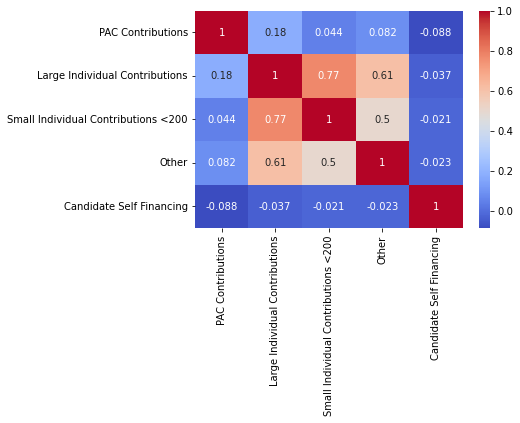

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# features of interest
contributions_df = df_finance[['PAC Contributions', 'Large Individual Contributions', 
                       'Small Individual Contributions <200', 'Other', 'Candidate Self Financing']]

# calculate the correlation matrix
corr_matrix = contributions_df.corr()

# plot the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display the plot
plt.show()

This heatmap illustrates the strength and direction of the relationship between each of the 5 campaign finance features that is effectively communicated through the use of color coding. From this graph, it can be observed that for the most part, each of these features do not have a linear relationship with each other as indicated by the numerous blue spaces that show a very weak, close to 0 relationship between many of the points. There are a few exceptions of some moderate relationships between the features of Other and Small Contributions (.5), Other and Large Contributions(.61), and Small Contributions and Large Contributions (.77). This all helps in understanding the pattern of these associations and how they relate to each other.

In [9]:
# calculating the bins values for the subsequent visualization

# minimum percentage value
df_min = df_finance['Winner Candidate Percentage'].min()

# maximum percentage value
df_max = df_finance['Winner Candidate Percentage'].max()

# range of percentage values
df_range = df_finance['Winner Candidate Percentage'].max() - df_finance['Winner Candidate Percentage'].min()

# step count to get from min to max in 5 runs
count = df_range / 5

# output
print("min: " + str(df_min) + ", max: " + str(df_max) + ", step: " + str(count))

min: 48.2, max: 100.0, step: 10.36


In [10]:
# minimum to start sequence
start = df_min

# maximum to end sequence
end = df_max

# value to count up by
step = count

# while ending value has not been reached, count up by step
current = start
while current <= end:
    print(current)
    current += step

48.2
58.56
68.92
79.28
89.64
100.0


/var/folders/5b/k4fc90j529ld1l6k3xtcrl880000gn/T/ipykernel_18453/2597153646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finance['Percentage Bin'] = pd.cut(df_finance['Winner Candidate Percentage'], bins=[48.2, 58.56, 68.92, 79.28, 89.64, 100],


<Figure size 1440x864 with 0 Axes>

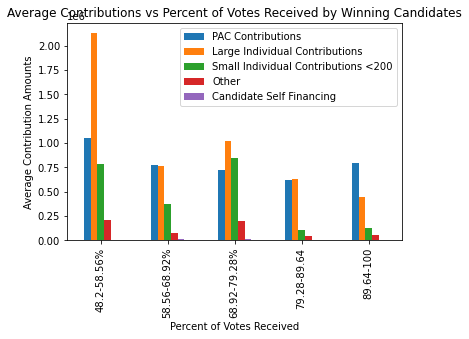

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# create a new column with the bin labels
df_finance['Percentage Bin'] = pd.cut(df_finance['Winner Candidate Percentage'], bins=[48.2, 58.56, 68.92, 79.28, 89.64, 100], 
                                      labels=['48.2-58.56%', '58.56-68.92%', '68.92-79.28%', '79.28-89.64', '89.64-100'])

# group the data by percentage bin and aggregate the columns of interest
grouped_data = df_finance.groupby('Percentage Bin')[['PAC Contributions', 'Large Individual Contributions', 
                       'Small Individual Contributions <200', 'Other', 'Candidate Self Financing']].mean()

# set the figure size
plt.figure(figsize=(20, 12))

# plot the data as a grouped bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Percent of Votes Received')
plt.ylabel('Average Contribution Amounts')
plt.title('Average Contributions vs Percent of Votes Received by Winning Candidates')

# change the font size of the legend
plt.legend(fontsize='10')

plt.show()

This segmented bar chart divides the candidates into separate bins by the winning candidate's percentage of votes received and then inspects where these bins ranging from close call elections to landslide elections from left to right get their contributions from. By segmenting the bars into different sections based on percentage, it becomes easier to see how the average contribution amounts vary across these different segments. The main taekaway here is that as you increase through the winning candidate percentages, each average campaign finance category goes down. This highlights an interesting direction that initially was not expected and  will be later assessed in the machine learning models. This information is effectively communicated with readers through a clear and organized manner that is easy to interpret. The use of color also helps to differentiate between the different campaign finance features, making it easier for the reader to follow along. The use of a legend and clear axis labels also helps to guide the reader and provide context for the data.

##### Small Note #####
The reason some winning candidates have  percentage less than 50 is because of the presence of multiple competiting candidate from other small political parties like Libertarian or Independent who ran and took votes away from Democrats and Republicans.

## Method ##


We will be utilizing machine learning analysis within a multiple part implementation:

Linear Regression Model:
- We will first be running a linear regression model between the winning candidate's percentage of votes received and the total contributions received by the candidate (combined calculation of PAC Contributions, Large Contributions, Small Contributions, Other, and Self-Financing). This will help us in understanding the general positive or negative relationship between these variables to assess whether a candidate winning in a landslide election (ie a higher winning percentage) can be associated with a higher amount of contributions received. It also enables us to make predictions about the expected value of the dependent variable (total contributions received) for any given value of the independent variable. 

Cross Validated R^2 Random Forest Regressor:
- This calculation will allow us to assess how much the random forest regression model explains the variance in the winning candidate's percentage of votes received variable. This is to say how much can the model captures the relationships between the finance features and win percentage. Utilizing cross validation helps ensure that the model is not prone to overfitting to the training data and can generalize well to new data.

Random Forest Regressor Features Importance Graph:
- Subsequently calculating a Random Forest Regressor Features Importance Graph allows us to see the relative importance of each of the finance features in predicting the winner candidate majority percentage.

# Results #

### Linear Regression Model ###

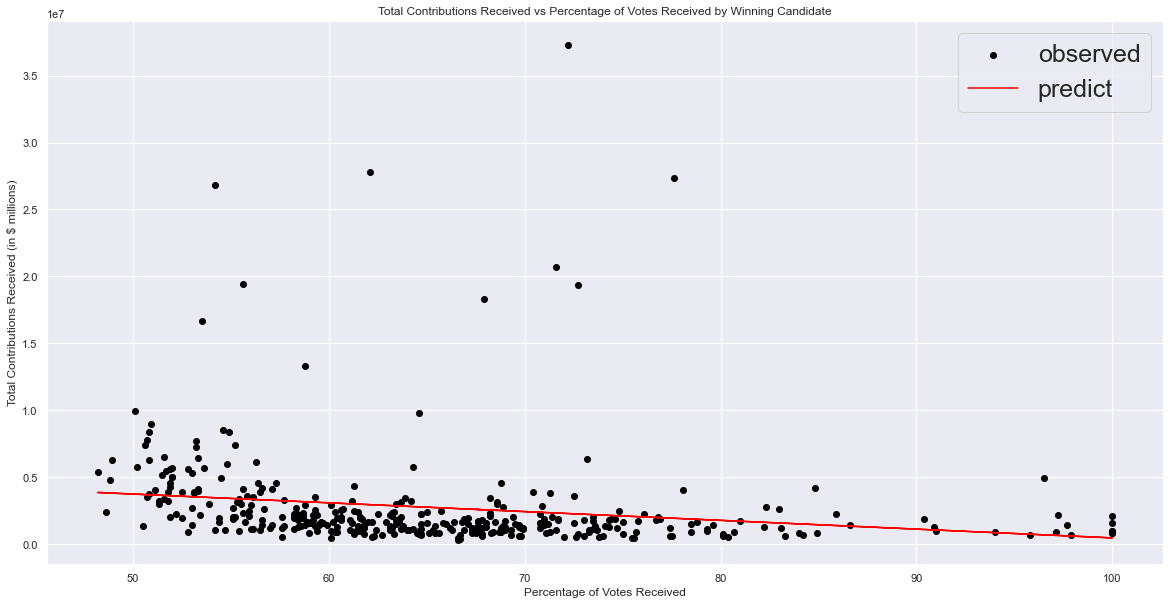

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns


x = df_finance.loc[:, 'Winner Candidate Percentage'].values.reshape(-1, 1)
y = df_finance.loc[:, 'Total'].values

# fit linear regression model to x and y
reg = LinearRegression()
reg.fit(x, y)

# get the slope and intercept
slope = reg.coef_[0]
intercept = reg.intercept_

# stylizes the graph
sns.set()

# plot the data and the regression line
plt.figure(figsize=(20,10))

# plots scatterplot and labels for the points as observed
plt.scatter(x, y, label='observed', color = "black")

# plots regression line 
plt.plot(x, reg.predict(x), label='predict', color='red')

# labels x and y axes
plt.xlabel("Percentage of Votes Received")
plt.ylabel('Total Contributions Received (in $ millions)')
plt.title('Total Contributions Received vs Percentage of Votes Received by Winning Candidate')


# sets size of legend
plt.legend(fontsize=25)

# plot graph
plt.show()

The purpose of this chart is to analyze the relationship between the total contributions received by winning candidates and the percentage of votes received, to determine whether there is any correlation between the two variables. The chart shows that there are many outliers scattered throughout the plot but overall, there is a negative relationship between the percentage of votes for a winning candidate and the total contributions received.

### Cross validated  R^2 for a RandomForestRegressor  ###

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from copy import copy

# params
x_feat_list = ['PAC Contributions',
       'Large Individual Contributions', 'Small Individual Contributions <200',
       'Other', 'Candidate Self Financing']

y_feat = 'Winner Candidate Percentage'
n_splits = 5

# extract features
x = df_finance.loc[:, x_feat_list].values
y_true = df_finance.loc[:, y_feat].values

# init random forest
rf_reg = RandomForestRegressor()

# cross validate loop
y_pred = copy(y_true)
kfold = KFold(n_splits=n_splits, shuffle=True)
for train_idx, test_idx in kfold.split(x, y_true):
    # extract x, y feat for cross validation loop
    x_train = x[train_idx, :]
    x_test = x[test_idx, :]
    y_train = y_true[train_idx]
    
    # fit model from training data, predict on test data
    rf_reg.fit(x_train, y_train)
    y_pred[test_idx] = rf_reg.predict(x_test)
    
r2 = r2_score(y_pred=y_pred, y_true=y_true)
r2

0.18512639409996623

The cross-validated r^2 value of this graph is 0.1973 (on our first run). This indicates that the relationship between the variables is not particularly strong, as the model only accounts for 19.73% of the variance in the dependent variable.

### Random Forest Regressor Features Importance Graph ###

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# define features and target
x_feat_list = ['PAC Contributions',
       'Large Individual Contributions', 'Small Individual Contributions <200',
       'Other', 'Candidate Self Financing']

x = df_finance.loc[:, x_feat_list].values
y = df_finance.loc[:, 'Winner Candidate Percentage'].values

# Initialize random forest regressor
rf_regr = RandomForestRegressor(n_estimators=100)

# Fit the random forest regressor to the training data
rf_regr.fit(x, y)

RandomForestRegressor()

In [15]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    Args:
    feat_list (list): str names of features
    feat_import (np.array): feature importances (mean gini reduce)
    sort (bool): if True, sorts features in decreasing importance
        from top to bottom of plot
    limit (int): if passed, limits the number of features shown
        to this value    
    """

    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 

    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]

    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Mean Squared Error across all Decision Trees)')

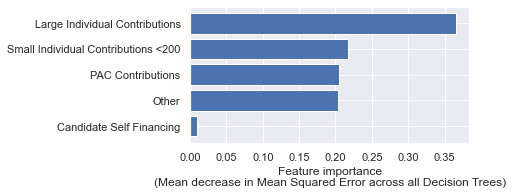

In [16]:
import numpy as np
import seaborn as sns

# adds style to viusalization
sns.set()

# call function to visualize feature importance graph
plot_feat_import(x_feat_list, rf_regr.feature_importances_, limit=10)

The graph depicts the importance of different financial contribution variables in determining the value of r^2. It shows that the "Large Individual Contributions" feature has the most significant influence on the model's predictions compared to “PAC Contributions" and "Candidate Self Financing", indicating that their association with a candidate's percentage of votes may not be as strong as the other variables.

# Conclusion & Discussion #

### Main Takeaways ###
The Linear Regression model indicates a very weak, close to 0 linear relationship between winning percentage and total contributions. Despite this weak relationship, contrary to our hypothesis, it does show a negative relationship: those who were on the higher end of a landslide election with a winner majority percentage of close to 100 had less campaigin financing than those who had more of a close call election with a lower candidate majority percentage. By then utilizing a cross-validated R-squared analysis, the data was then split into training and testing sets to then train the model on the training data, and then evaluate the model's performance on the testing data. This process was repeated several times to ensure that the model's performance was reliable and consistent and ultimately resulted in a R-squared value of 0.197 indicates that the model explains approximately 20% of the variance in the target variable, leaving 80% unaccounted for. The features importance graph subsequently highlights what the most important campaign financing features were most important in determining that r^2 score; the results showing that it was Large Individual Contributions. Although no strong correlation was detected between campaign contributions and the result of the election, that does not mean that citizens should stop donating to the candidates that they believe in. Donations can still have a significant impact and further exploration should be done to see how much of an impact these donations have.

### Potential Confounding Variables ###

#### Incumbency Status: ####
With these models contradicting the very positive relationship we thought would occur between these two variables, an outside factor that was initially thought of for possibly having an impact on the data was the incumbency status of each candidate (those who previously held the position). After all, as aforementioned in the introduction, the 1998 House of Representatives election incumbents seeking reelection had a better than 98% success rate. However, after analyzing the unqiue values in the results column and dividing the "incumbent" rows by all the rows in the dataframe, almost 100% is made up of incumbent candidates meaning that everyone who won in this dataset was an incumbent and indicating incumbency status had no impact on the winning percentage (the calculation can be seen in the following cells below). Perhaps the differentiating factor with incumbency status is the number of terms a representative has served for. Even though Representatives have two-year terms, there are no limit on the number of terms they may serve so it is possible that the higher the number of terms they serve, the more likely they are to get reelected.

#### Super PACS: ####
Another possible confounding variable that could have an effect on the results of this data is the prominence of Super PACs in recent campaigns. The controversial Supreme Court case, Citizen United vs. FEC (2010) resulted in the arrival of Super PACs. Super PACs are able to collect essentially unlimited funds, often from large corporations. These Super PACs can raise billions of dollars. These PACs can not be directly associated with a certain political candidate, although they can campaign for them, and as a result, the financial information was not included in our dataset. Our dataset instead inspected money directly obtained by the candidate. Our weak correlation could indicate the significant impact that Super PACs could have. The funds these Super PACs raise have such a large impact on the linear relationship between the two variables that they make any other donation, the ones included in our dataset, insignificant.

#### Law of Diminishing Returns: ####
Another possiblity for this minimal relationship between the two variables is because of diminishing returns. It's possible that beyond a certain point, additional campaign contributions have a diminishing impact on the outcome of the election. For example, if a candidate has already spent a lot of money on advertising and outreach, additional contributions may not significantly increase their support among voters. Another consideration is the quality and strength of a challenger's campaign and the number of competitor's from other third-parties including Independent and Libertarian which can impact the overall political climate and sentiment towards incumbents.

### Limitations with Challenger Data & Future Directions: ###
The challenger losing candidate campaign data was initially of interest to us but unfortunately, could not be found on the Open Secrets website. However, if it could be found and gathered, the next area of interest to look into is to assess the difference in funding between the incumbent and challenger candidates and assess its correlation with the winning and losing candidates' percentages (possible direction would that the higher difference in funding, the higher the percentage difference of votes between winner and loser). According to Citizens for United States Direct Initiatives, "By far the most widely recognized and probably the most significant advantage enjoyed by sitting members of Congress is the large amounts of campaign contributions they are able to raise, especially in comparison to those who run against them" (1), this validates the significance of this future direction for researchers to consider when making datasets on this topic. Some questions, I imagine may come up is when collecting candidate data from another dataset, a researcher may fall into a problem where there are discrepencies with the names in that some may use a middle name or nickname to refer to the candidate, making it in impossible to join candidate tables by there names or iterate through the tables. One possible direction to compensate for this is to use Levenshtein distance, which measures how many “edit operations” you’d have to do to one string to produce the other (edit operations: add char, swap char, etc).

### Ethical Implications ###
The most striking ethical implication that comes from this data report is the use of web scraping to collect Wikipedia table information. This lends itself to possible legal issues, privacy concerns, concerns with data inaccuracy, and bias:
- Legal Issues: Web scraping can potentially violate copyright laws or the terms of service of the website being scraped. While Wikipedia content is generally available under a Creative Commons license, it is important to ensure that any data being scraped is being used in accordance with the license and that attribution is given where appropriate
- Privacy Concerns: Wikipedia articles may contain information about individuals, and scraping this data without their consent may be a violation of their privacy. It is important to consider whether the information being scraped is public or private and whether individuals have consented to its use
- Data Inaccuracy Concerns: Wikipedia content can be edited by anyone, and scraping inaccurate data can perpetuate false information. It is important to verify the accuracy of the data being scraped before using it for any analysis or research
- Bias: Wikipedia content can be subject to bias or editorial influence, and scraping data without considering these factors can lead to biased results. It is important to consider the potential biases in Wikipedia content and to evaluate whether the data being scraped is representative of the population or phenomenon being studied

(1): https://cusdi.org/faq/why-are-sitting-members-of-congress-almost-always-reelected/



In [17]:
df_finance['Results'].unique()

array(['Incumbent re-elected.', 'Incumbent re-elected',
       'Incumbent retired.New member elected.Republican hold.'],
      dtype=object)

In [18]:
count = df_finance['Results'].isin(['Incumbent re-elected.', 'Incumbent re-elected']).sum()
percentage = count / 372 * 100
print("{:.2f}% of the candidates are incumbents in this dataset".format(percentage))

99.73% of the candidates are incumbents in this dataset


# Appendix - Attempt at Making Web Scraping Bot to Obtain Campaign Finance Information for Each Candidate on Open Secrets

In [19]:
# Sample of code for scraping the financial information for ONE candidate from Open Secrets Website

import time
import requests
from selenium import webdriver
from bs4 import BeautifulSoup

# website to scrape from
response = requests.get("https://www.opensecrets.org/members-of-congress/barry-moore/summary?cid=N00041295&cycle=2020")

# parse HTML content of web page
soup = BeautifulSoup(response.text, 'html.parser')

# identified tags within html that obtain the numbers for each campaign finance data piece
position = soup.find_all("td", class_="number")[30:40:2]

# empty list to append to
values = []

# identified tags within html that obtain the numbers for each campaign finance data piece
for p in position:
    value = p.text.strip().replace('$', '').replace(',', '')
    values.append(float(value))
    
values

[483798.0, 343389.0, 40623.0, 2126.0, 0.0]

In [20]:
import time
import requests
from selenium import webdriver
from bs4 import BeautifulSoup

# Define the get_position function to extract the desired information from a webpage
def get_position(website_url):
    """ obtains the campaign finance data through web scraping

    Args:
    website_url (str): url of the candidate's website on Open Secrets
    
    Returns:
    values (list): the campaign finance data in the 5 categories
    
    """
    # website to scrape from
    response = requests.get("https://www.opensecrets.org/members-of-congress/barry-moore/summary?cid=N00041295&cycle=2020")
    
    # parse HTML content of web page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # identified tags within html that obtain the numbers for each campaign finance data piece
    position = soup.find_all("td", class_="number")[30:40:2]
    
    # identified tags within html that obtain the numbers for each campaign finance data piece
    values = []
    for p in position:
        value = p.text.strip().replace('$', '').replace(',', '')
        values.append(float(value))
    
    return values

# candidate's names whose information we want on Open Secrets
# sampling five to show result error
names = df_finance["Winner Candidate"].tolist()[:5]

# Initialize the web driver
driver = webdriver.Chrome()

positions = []

# Loop through each name and search on Open Secrets
for name in names:
    
    # separate first and last name with -
    query = name.replace(' ', '-')
    
    # input candidate's name within hyperlink
    driver.get(f'https://www.opensecrets.org/members-of-congress/{query}/summary?cid=N00041295&cycle=2020')
    
    # Wait for the page to load
    time.sleep(3)  

    # Extract the search result page HTML and parse it with BeautifulSoup
    search_results = driver.page_source
    soup = BeautifulSoup(search_results, 'html.parser')

    # Extract the website URL from the top search result
    website_url = f'https://www.opensecrets.org/members-of-congress/{query}/summary?cid=N00041295&cycle=2020'

    # Call the get_position function to obtain the desired information about the individual
    position = get_position(website_url)
    positions.append(position)
    print(f"{name} is a {position}")

# Close the web draiver
driver.quit()

# add new column in dataframe with all finance information
df_finance["Financial Data"] = positions

Mike D. Rogers is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]
Robert Aderholt is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]
Mo Brooks is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]
Gary Palmer is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]
Terri Sewell is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]


ValueError: Length of values (5) does not match length of index (372)

### Sample Output ###
Mike D. Rogers is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]

Robert Aderholt is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]

Mo Brooks is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]

Gary Palmer is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]

Terri Sewell is a [483798.0, 343389.0, 40623.0, 2126.0, 0.0]


##### Making an automatic web bot that scrapes this data was more difficult then anticiated because of the fact that within each website's url, there is a unique cid that makes it so whatever the model website is, the for loop will just iterate through the names in the columns and attach the same financial campaign numbers from the first initial website collection. If we had more time would we would have considered how to overcome this issue, but with the project's focus on machine learning, we wanted to collect the data in the fastest, most efficient way possible which was splitting the work up amidst our group and collecting the data by hand (and was permitted by the Professor). #